In [ ]:
!pip install xarray netCDF4 scikit-learn tensorflow matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.5 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# === 1. Upload your .tar.gz file ===
from google.colab import files
uploaded = files.upload()

Saving Environmental Anomaly Detection.tar.gz to Environmental Anomaly Detection.tar.gz


In [4]:
# === 2. Extract the archive ===
import tarfile   # ✅ make sure tarfile is imported

tar_path = "Environmental Anomaly Detection.tar.gz"
extract_dir = "dataset"

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print("Extraction complete. Files in dataset/:", os.listdir(extract_dir)[:10])


/tmp/ipython-input-1893400150.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)


Extraction complete. Files in dataset/: ['bodc', 'csiro', 'jma', 'meds', 'aoml', 'csio', 'kma', 'incois', 'coriolis']


In [5]:
import os, xarray as xr

# Look at first .nc file in dataset
for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.endswith(".nc"):
            path = os.path.join(root, file)
            ds = xr.open_dataset(path)
            print("File:", file)
            print(ds)
            break


File: R1902114_027.nc
<xarray.Dataset> Size: 51kB
Dimensions:                       (N_PROF: 1, N_PARAM: 3, N_LEVELS: 598,
                                   N_CALIB: 1, N_HISTORY: 3)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 24B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 24B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 12B ...
    HISTORY_QCTEST                (N_HI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R5905608_004.nc
<xarray.Dataset> Size: 85kB
Dimensions:                       (N_PROF: 1, N_PARAM: 3, N_LEVELS: 1003,
                                   N_CALIB: 1, N_HISTORY: 2)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 16B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 16B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 8B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 8B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 8B ...
    HISTORY_QCTEST                (N_HIST

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Streaming output truncated to the last 5000 lines.
File: R5906884_004.nc
<xarray.Dataset> Size: 146kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 751,
                                   N_CALIB: 1, N_HISTORY: 3)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 48B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 48B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 24B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 24B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) flo

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R3902664_008.nc
<xarray.Dataset> Size: 121kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 599,
                                   N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 48B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R1902714_025.nc
<xarray.Dataset> Size: 101kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 498,
                                   N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 48B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R1902732_016.nc
<xarray.Dataset> Size: 20kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 94,
                                   N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 48B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R5907213_007.nc
<xarray.Dataset> Size: 35kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 168,
                                   N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 48B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: SR4903847_067.nc
<xarray.Dataset> Size: 244kB
Dimensions:                           (N_PROF: 1, N_PARAM: 8, N_CALIB: 1,
                                       N_LEVELS: 966)
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/86)
    DATA_TYPE                         object 8B ...
    FORMAT_VERSION                    object 8B ...
    HANDBOOK_VERSION                  object 8B ...
    REFERENCE_DATE_TIME               object 8B ...
    DATE_CREATION                     object 8B ...
    DATE_UPDATE                       object 8B ...
    ...                                ...
    CDOM                              (N_PROF, N_LEVELS) float32 4kB ...
    CDOM_QC                           (N_PROF, N_LEVELS) object 8kB ...
    CDOM_dPRES                        (N_PROF, N_LEVELS) float32 4kB ...
    CDOM_ADJUSTED                     (N_PROF, N_LEVELS) float32 4kB ...
    CDOM_ADJUSTED_QC                  (N_PROF, N_LEVELS) object 8kB ...
    CDOM_AD

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R6990657_047D.nc
<xarray.Dataset> Size: 16kB
Dimensions:                       (N_PROF: 1, N_PARAM: 5, N_LEVELS: 133,
                                   N_HISTORY: 3, N_CALIB: 2)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/70)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 24B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R1902734_050.nc
<xarray.Dataset> Size: 200kB
Dimensions:                       (N_PROF: 2, N_PARAM: 4, N_LEVELS: 993,
                                   N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/67)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 48B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 64B ...
    SCIENTIFI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

File: R5907174_020.nc
<xarray.Dataset> Size: 113kB
Dimensions:                       (N_PROF: 1, N_PARAM: 5, N_LEVELS: 998,
                                   N_HISTORY: 3, N_CALIB: 2)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/70)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 24B ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object 80B ...
    SCIENTIFI

/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3491623588.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

In [6]:
data_list = []

for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith(".nc"):
            path = os.path.join(root, file)
            try:
                ds = xr.open_dataset(path)
                print("Loaded:", file)

                # ✅ Use ARGO-standard variable names
                temp = ds["TEMP"].values.flatten() if "TEMP" in ds else None
                sal = ds["PSAL"].values.flatten() if "PSAL" in ds else None
                depth = ds["PRES"].values.flatten() if "PRES" in ds else None

                if temp is not None and sal is not None and depth is not None:
                    df = pd.DataFrame({
                        "temperature": temp,
                        "salinity": sal,
                        "depth": depth
                    }).dropna()
                    data_list.append(df)

            except Exception as e:
                print("Error loading", file, ":", e)

# Combine all files
if data_list:
    data = pd.concat(data_list, ignore_index=True)
else:
    raise ValueError("No valid NetCDF files found in extracted archive!")

print("✅ Final dataset shape:", data.shape)
print(data.head())

Loaded: R1902114_027.nc
Loaded: R1902796_040.nc
Loaded: R1902796_039.nc
Loaded: R1902796_041.nc
Loaded: R7902320_039.nc
Loaded: R7902320_038.nc
Loaded: R7902320_041.nc
Loaded: R7902320_040.nc
Loaded: R7902230_021.nc
Loaded: R2903942_023.nc
Loaded: R5907132_023.nc
Loaded: R1901929_021.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R6990670_048.nc
Loaded: R1901930_021.nc
Loaded: R1901771_020.nc
Loaded: R5905589_026.nc
Loaded: R5905587_027.nc
Loaded: R5905596_023.nc
Loaded: R5905591_026.nc
Loaded: R5905608_004.nc
Loaded: R5905594_023.nc
Loaded: SR5905597_038.nc
Loaded: R5905597_038.nc
Loaded: R5905609_004.nc
Loaded: R5905607_004.nc
Loaded: R5905586_027.nc
Loaded: R5905601_021.nc
Loaded: R5905603_018.nc
Loaded: R5905606_005.nc
Loaded: R5905605_014.nc
Loaded: R7900969_025.nc
Loaded: R5905588_027.nc
Loaded: R5905590_026.nc
Loaded: R5905592_025.nc
Loaded: R1901772_020.nc
Loaded: R5905593_024.nc
Loaded: R5905595_023.nc
Loaded: R5905599_021.nc
Loaded: R5905600_021.nc
Loaded: SR5905598_036.nc
Loaded: R5905598_036.nc
Loaded: R5905604_017.nc
Loaded: SR7900889_008.nc
Loaded: R7900889_007.nc
Loaded: R7900889_008.nc
Loaded: SR7900889_005.nc
Loaded: R7900889_006.nc
Loaded: SR7900889_006.nc
Loaded: SR7900889_007.nc
Loaded: R7900889_005.nc
Loaded: SR5906603_023.nc
Loaded: R5906603_023.nc
Loaded: R5906612_012.nc
Loaded: S

/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR4902681_135.nc
Loaded: R4902681_135.nc
Loaded: R4902681_134D.nc
Loaded: SR4902681_135D.nc
Loaded: R4902699_018.nc
Loaded: R4902693_014.nc
Loaded: SR4902691_013.nc
Loaded: R4902691_013.nc
Loaded: R4902701_015.nc
Loaded: SR4902683_142.nc
Loaded: SR4902683_138.nc
Loaded: R4902683_137D.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R4902683_139.nc
Loaded: R4902683_136D.nc
Loaded: R4902683_139D.nc
Loaded: R4902683_142D.nc
Loaded: R4902683_138D.nc
Loaded: R4902683_136.nc
Loaded: R4902683_137.nc
Loaded: SR4902683_137.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR4902683_137D.nc
Loaded: R4902683_142.nc
Loaded: SR4902683_142D.nc
Loaded: SR4902683_136.nc
Loaded: R4902683_138.nc
Loaded: SR4902683_139D.nc
Loaded: SR4902683_138D.nc
Loaded: SR4902683_136D.nc
Loaded: SR4902683_139.nc
Loaded: R4902703_022.nc
Loaded: R4902696_014.nc
Loaded: R4902702_017.nc
Loaded: R4902690_014.nc
Loaded: SR4902690_014.nc
Loaded: R4902694_022.nc
Loaded: R5907202_007.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R1902653_019.nc
Loaded: SR1902653_019.nc
Loaded: R4903905_004.nc
Loaded: R1902781_002.nc
Loaded: SR2903920_014.nc
Loaded: R2903920_014.nc
Loaded: R6990671_020.nc
Loaded: SR6990671_020.nc
Loaded: R1902760_018.nc
Loaded: R1902630_018.nc
Loaded: R1902623_023.nc
Loaded: SR2904014_002.nc
Loaded: R2904014_002.nc
Loaded: R6990564_014.nc
Loaded: R6990564_013.nc
Loaded: R6990559_016.nc
Loaded: SR2903967_004.nc
Loaded: R2903967_004.nc
Loaded: SR4903855_001.nc
Loaded: R4903855_001.nc
Loaded: SR2903941_020.nc
Loaded: R2903941_020.nc
Loaded: R6990704_019.nc
Loaded: R1902633_016.nc
Loaded: R3902335_019.nc
Loaded: SR2903921_013.nc
Loaded: R2903921_013.nc
Loaded: R3902615_026.nc
Loaded: SR3902615_026.nc
Loaded: R7902211_031.nc
Loaded: R3902700_001D.nc
Loaded: R3902700_006D.nc
Loaded: R3902700_000.nc
Loaded: R3902700_004D.nc
Loaded: R3902700_002D.nc
Loaded: R3902700_003D.nc
Loaded: R3902700_005D.nc
Loaded: R1902761_018.nc
Loaded: SR5907131_013.nc
Loaded: R5907131_013.nc
Loaded: R6990555_013.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR7902260_038.nc
Loaded: R7902260_038.nc
Loaded: SR7902260_037.nc
Loaded: R7902260_037.nc
Loaded: SR6990685_015.nc
Loaded: SR6990685_016.nc
Loaded: R6990685_016.nc
Loaded: R6990685_015.nc
Loaded: R2903956_100.nc
Loaded: R2903956_097.nc
Loaded: R2903956_099.nc
Loaded: R2903956_098.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R3902631_128.nc
Loaded: SR4903820_010.nc
Loaded: R4903820_010.nc
Loaded: R6904233_021.nc
Loaded: SR6904233_021.nc
Loaded: R2903904_019.nc
Loaded: SR2903904_019.nc
Loaded: R2904028_009.nc
Loaded: R2904028_010.nc
Loaded: R3902664_008.nc
Loaded: SR3902664_008.nc
Loaded: SR5907146_017.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R5907146_016.nc
Loaded: R5907146_017.nc
Loaded: SR5907146_016.nc
Loaded: SR1902660_040.nc
Loaded: R1902660_040.nc
Loaded: R7902185_013.nc
Loaded: R7902334_010.nc
Loaded: SR7902334_010.nc
Loaded: SR7902334_009.nc
Loaded: R7902334_009.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R6990700_034.nc
Loaded: SR6990700_034.nc
Loaded: R7902283_014.nc
Loaded: R7902283_013.nc
Loaded: R1902620_005.nc
Loaded: R7902178_042.nc
Loaded: SR7902178_042.nc
Loaded: R3902657_048.nc
Loaded: SR3902657_048.nc
Loaded: R7902183_013.nc
Loaded: R5907169_020.nc
Loaded: R1902714_025.nc
Loaded: SR1902714_025.nc
Loaded: R1902792_131.nc
Loaded: R1902792_126.nc
Loaded: R1902792_127.nc
Loaded: R1902792_124.nc
Loaded: R1902792_123.nc
Loaded: R1902792_128.nc
Loaded: R1902792_125.nc
Loaded: R1902792_130.nc
Loaded: R1902792_129.nc
Loaded: R1902757_047.nc
Loaded: SR1902757_047.nc
Loaded: SR4903821_010.nc
Loaded: R4903821_010.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R2903996_024.nc
Loaded: SR3902691_017.nc
Loaded: R3902691_017.nc
Loaded: R7902236_017.nc
Loaded: R6990680_028.nc
Loaded: R6990680_033.nc
Loaded: R6990680_031.nc
Loaded: R6990680_027.nc
Loaded: R6990680_030.nc
Loaded: R6990680_029.nc
Loaded: R6990680_032.nc
Loaded: R4903881_032.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R4903881_031.nc
Loaded: SR4903881_031.nc
Loaded: SR4903881_032.nc
Loaded: R3902610_016.nc
Loaded: SR1902751_086.nc
Loaded: R1902751_087.nc
Loaded: R1902751_088.nc
Loaded: SR1902751_085.nc
Loaded: SR1902751_088.nc
Loaded: SR1902751_087.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R1902751_086.nc
Loaded: R1902751_085.nc
Loaded: R7902202_017.nc
Loaded: SR4903886_004.nc
Loaded: R4903886_004.nc
Loaded: R1902732_016.nc
Loaded: R6990664_016.nc
Loaded: R6999995_005.nc
Loaded: R4903683_007.nc
Loaded: R2903998_009.nc
Loaded: R2903998_009D.nc
Loaded: R7902315_122.nc
Loaded: R7902315_126.nc
Loaded: R7902315_130.nc
Loaded: R7902315_129.nc
Loaded: R7902315_127.nc
Loaded: R7902315_128.nc
Loaded: R7902315_124.nc
Loaded: R7902315_123.nc
Loaded: R7902315_125.nc
Loaded: R7902237_016.nc
Loaded: R5907193_027.nc
Loaded: SR5907193_027.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR5907193_026.nc
Loaded: R5907193_026.nc
Loaded: R3902665_021.nc
Loaded: SR6904232_022.nc
Loaded: R6904232_022.nc
Loaded: R5907168_022.nc
Loaded: R5907213_007.nc
Loaded: SR5907213_007.nc
Loaded: R3902677_026.nc
Loaded: R3902677_026D.nc
Loaded: R1902755_015.nc
Loaded: R3902628_014.nc
Loaded: R7902279_066.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR7902279_066.nc
Loaded: R7902219_024.nc
Loaded: SR7902219_024.nc
Loaded: R7902323_054.nc
Loaded: R7902323_055.nc
Loaded: R7902323_057.nc
Loaded: R7902323_056.nc
Loaded: R7902323_058.nc
Loaded: R6990677_017.nc
Loaded: R5907167_015.nc
Loaded: R7902182_019.nc
Loaded: SR5907147_061.nc
Loaded: SR5907147_062.nc
Loaded: SR5907147_064.nc
Loaded: R5907147_062.nc
Loaded: SR5907147_067.nc
Loaded: SR5907147_063.nc
Loaded: R5907147_061.nc
Loaded: R5907147_064.nc
Loaded: R5907147_066.nc
Loaded: SR5907147_066.nc
Loaded: R5907147_063.nc
Loaded: R5907147_067.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR5907147_065.nc
Loaded: R5907147_065.nc
Loaded: R5907147_059.nc
Loaded: R5907147_060.nc
Loaded: SR5907147_059.nc
Loaded: SR5907147_060.nc
Loaded: SR3902587_017.nc
Loaded: R3902587_017.nc
Loaded: R1902783_020.nc
Loaded: R1902783_019.nc
Loaded: SR1902783_019.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR1902783_020.nc
Loaded: SR4903847_067.nc
Loaded: R4903847_067.nc
Loaded: R4903847_070.nc
Loaded: SR4903847_071.nc
Loaded: R4903847_073.nc
Loaded: R4903847_069.nc
Loaded: SR4903847_068.nc
Loaded: SR4903847_074.nc
Loaded: SR4903847_073.nc
Loaded: SR4903847_069.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR4903847_072.nc
Loaded: R4903847_071.nc
Loaded: R4903847_068.nc
Loaded: R4903847_066.nc
Loaded: SR4903847_070.nc
Loaded: SR4903847_066.nc
Loaded: R4903847_074.nc
Loaded: R4903847_072.nc
Loaded: R7901133_022.nc
Loaded: SR7901133_022.nc
Loaded: R7901133_023.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR7901133_023.nc
Loaded: R2904025_004.nc
Loaded: R3902667_034.nc
Loaded: R7902181_022.nc
Loaded: R2904023_022.nc
Loaded: SR2904023_021.nc
Loaded: R2904023_021.nc
Loaded: SR2904023_022.nc
Loaded: R2903947_015.nc
Loaded: SR2903947_015.nc
Loaded: R3902625_015.nc
Loaded: R5907105_014.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR5907105_014.nc
Loaded: SR7902218_026.nc
Loaded: R7902218_026.nc
Loaded: R2903991_021.nc
Loaded: R7902328_004.nc
Loaded: R6990665_016.nc
Loaded: R6990657_047D.nc
Loaded: R6990657_047.nc
Loaded: R2904024_022.nc
Loaded: SR2904024_022.nc
Loaded: R7902326_008.nc
Loaded: SR7902326_008.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R3902592_017.nc
Loaded: R6990684_017.nc
Loaded: SR6990684_017.nc
Loaded: R6990684_018.nc
Loaded: SR6990684_018.nc
Loaded: R6990707_045.nc
Loaded: R6990707_044D.nc
Loaded: SR6990707_045.nc
Loaded: SR6990707_044D.nc
Loaded: R6990707_043.nc
Loaded: SR6990707_045D.nc
Loaded: R6990707_045D.nc
Loaded: SR6990707_044.nc
Loaded: SR6990707_046D.nc
Loaded: R6990707_044.nc
Loaded: R6990707_043D.nc
Loaded: SR6990707_043.nc
Loaded: R6990707_046D.nc
Loaded: R6990707_046.nc
Loaded: SR6990707_043D.nc
Loaded: SR6990707_046.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R2903992_020.nc
Loaded: R1902756_020.nc
Loaded: SR6990727_019.nc
Loaded: R6990727_019.nc
Loaded: R6990709_020.nc
Loaded: SR7902217_010.nc
Loaded: R7902217_010.nc
Loaded: R5907204_009.nc
Loaded: SR5907204_009.nc
Loaded: R1902734_050.nc
Loaded: R1902734_051.nc
Loaded: R1902734_052.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R5907217_001D.nc
Loaded: R5907217_001.nc
Loaded: R5907175_034.nc
Loaded: R7902285_034.nc
Loaded: R7902291_002.nc
Loaded: R5907207_005.nc
Loaded: R3902692_015.nc
Loaded: SR3902692_015.nc
Loaded: R1902772_070.nc
Loaded: R1902772_069.nc
Loaded: R1902772_068.nc
Loaded: R1902772_064.nc
Loaded: R1902772_067.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R1902772_066.nc
Loaded: R1902772_065.nc
Loaded: R1902772_063.nc
Loaded: SR6990686_059.nc
Loaded: SR6990686_054.nc
Loaded: SR6990686_055.nc
Loaded: R6990686_058.nc
Loaded: R6990686_053.nc
Loaded: SR6990686_053.nc
Loaded: R6990686_055.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R6990686_054.nc
Loaded: R6990686_052.nc
Loaded: SR6990686_058.nc
Loaded: R6990686_057.nc
Loaded: SR6990686_056.nc
Loaded: R6990686_059.nc
Loaded: SR6990686_060.nc
Loaded: R6990686_060.nc
Loaded: SR6990686_052.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R6990686_056.nc
Loaded: SR6990686_057.nc
Loaded: R2903933_003.nc
Loaded: R1902759_068.nc
Loaded: R1902759_064.nc
Loaded: R1902759_063.nc
Loaded: R1902759_065.nc
Loaded: R1902759_069.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R1902759_066.nc
Loaded: R1902759_070.nc
Loaded: R1902759_067.nc
Loaded: R5907174_020.nc
Loaded: SR5906995_033.nc
Loaded: SR5906995_032.nc
Loaded: R5906995_032.nc
Loaded: R5906995_033.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R7902282_015.nc
Loaded: R7902282_014.nc
Loaded: R4903912_004.nc
Loaded: R3902624_016.nc
Loaded: SR7902193_002.nc
Loaded: R7902193_002.nc
Loaded: SR7901026_024.nc
Loaded: R7901026_024.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: SR7902177_040.nc
Loaded: R7902177_040.nc
Loaded: R2903903_017.nc
Loaded: SR2903903_017.nc
Loaded: SR7902179_039.nc
Loaded: R7902179_039.nc
Loaded: SR5907173_008.nc
Loaded: R5907173_008.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R7901146_026.nc
Loaded: SR7901146_026.nc
Loaded: R4903885_002.nc
Loaded: SR4903909_019.nc
Loaded: R4903909_019.nc
Loaded: SR4903909_020.nc
Loaded: R4903909_020.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R2904026_010.nc
Loaded: R4903872_034.nc
Loaded: R4903900_018.nc
Loaded: SR4903900_018.nc
Loaded: R7902290_034.nc
Loaded: R6990729_029.nc
Loaded: R5907141_083.nc
Loaded: R5907141_084.nc
Loaded: R5907141_081.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R5907141_082.nc
Loaded: R5907141_080.nc
Loaded: R6990530_058.nc
Loaded: R6990530_057.nc
Loaded: SR3902695_011.nc
Loaded: SR3902695_012.nc
Loaded: R3902695_012.nc
Loaded: R3902695_011.nc
Loaded: R7902180_022.nc


/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(path)
/tmp/ipython-input-3024677019.py:8: FutureWarning: In a future version, xarray will not decode the variable 'MTIME' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into

Loaded: R4903839_080.nc
Loaded: R4903839_083.nc
Loaded: R4903839_082.nc
Loaded: R4903839_081.nc
Loaded: R4903839_084.nc
Loaded: R7901042_014.nc
✅ Final dataset shape: (566199, 3)
   temperature   salinity  depth
0    25.540600  37.555901   2.40
1    25.552900  37.556198   3.98
2    25.553400  37.556301   6.00
3    25.553301  37.556400   8.00
4    25.552099  37.556400   9.94


In [7]:
# === Step 4. Preprocess ===
features = ["temperature", "salinity", "depth"]
X = data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# === Step 5. Isolation Forest ===
iso = IsolationForest(contamination=0.05, random_state=42)
labels_if = iso.fit_predict(X_scaled)
labels_if = np.where(labels_if == -1, 1, 0)
data["anomaly_iforest"] = labels_if
print("Isolation Forest anomalies:", data["anomaly_iforest"].sum())

Isolation Forest anomalies: 28305


In [10]:
# === Step 7. Autoencoder ===
input_dim = X_scaled.shape[1]
auto = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(input_dim, activation="linear")
])
auto.compile(optimizer="adam", loss="mse")

history = auto.fit(
    X_scaled, X_scaled,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Reconstruction error
recon = auto.predict(X_scaled)
mse = np.mean(np.square(X_scaled - recon), axis=1)
threshold = np.percentile(mse, 95)
data["anomaly_autoenc"] = (mse > threshold).astype(int)
print("Autoencoder anomalies:", data["anomaly_autoenc"].sum())

Epoch 1/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1056 - val_loss: 1.7655e-04
Epoch 2/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8348e-06 - val_loss: 3.4607e-05
Epoch 3/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2.5049e-06 - val_loss: 4.4878e-05
Epoch 4/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2.2314e-06 - val_loss: 4.3122e-05
Epoch 5/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2.6977e-06 - val_loss: 1.2478e-04
Epoch 6/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 2.6387e-06 - val_loss: 4.6054e-05
Epoch 7/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.8549e-06 - val_loss: 4.0449e-05
Epoch 8/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2.1349e-06 - val_loss: 4.6608e-05
Epoch 9/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 1.8495e-06 - val_loss: 4.2023e-05
Epoch 10/15
7078/7078 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.9999e-06 - val_loss: 4.1250e-05
Epoch 11/15
7078/7078 ━━━━━━━━━━━

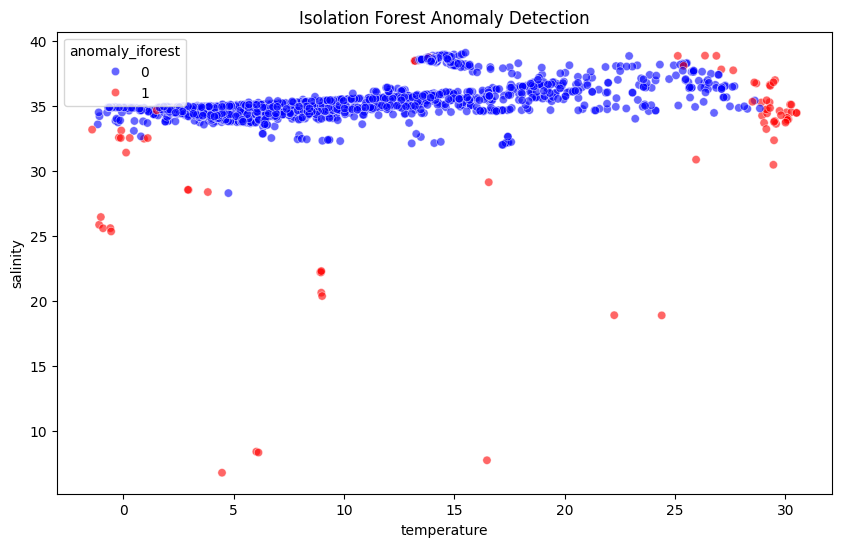

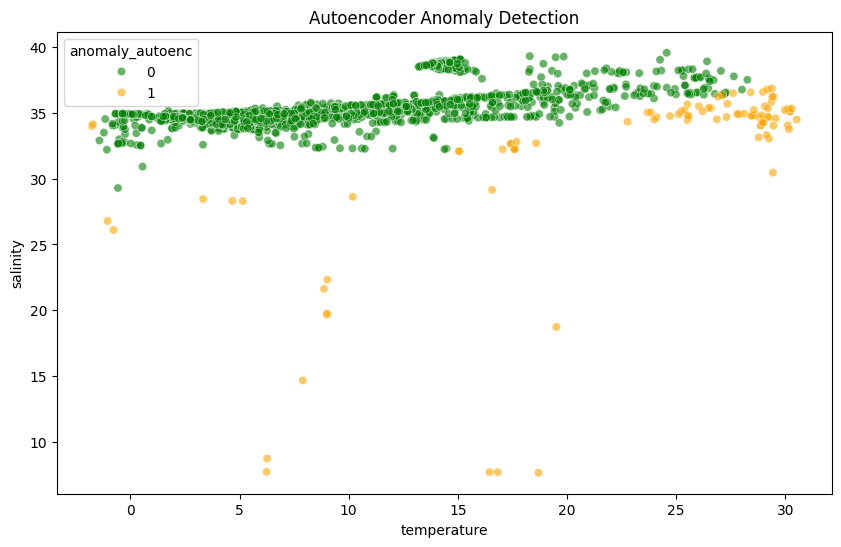

In [11]:
# === Step 8. Visualization ===
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.sample(2000),
    x="temperature", y="salinity",
    hue="anomaly_iforest", palette={0:"blue",1:"red"}, alpha=0.6
)
plt.title("Isolation Forest Anomaly Detection")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.sample(2000),
    x="temperature", y="salinity",
    hue="anomaly_autoenc", palette={0:"green",1:"orange"}, alpha=0.6
)
plt.title("Autoencoder Anomaly Detection")
plt.show()